In [1]:
import sys, os

pysbf_path = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/"
sys.path.insert(0, pysbf_path)
from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [2]:
inFolder = './data/'
outFolder = './output/'
configFolder = pysbf_path + 'pysbf/config/'

In [3]:
name = "u12517"

outFolder += "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

### Checking out the log file

In [4]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [5]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [6]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


In [7]:
Dmask = inFolder + "{}/{}j.dmask".format(name, name)
Dmask

'./data/u12517/u12517j.dmask'

In [8]:
r_aperture = 20  # [pix] radius of the avoding zone

# used Dmask instead of mask1
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

catal_df.head()

./output/Outputs_u12517/u12517_9f43b1726bf2/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,866.625,37.764,349.972745,43.978395,-12.4392,0.0190,4.543,1.669,-87.0,...,0.0135,0.0,-3696440.0,0.0,0.0,-12.2363,0.0128,-12.4195,0.0218,604.041376
1,2,17.345,37.745,349.939545,43.957126,-12.8511,0.0287,5.003,3.423,89.2,...,0.0486,0.0,-3696440.0,0.0,0.0,-12.0780,0.0188,-12.7826,0.0323,760.462490
2,3,432.295,30.635,349.955540,43.967697,-11.6309,0.0324,1.995,1.156,54.8,...,0.0234,0.0,-3696440.0,0.0,0.0,-11.0379,0.0238,-11.2672,0.0422,548.924907
3,4,491.421,22.990,349.957612,43.969369,-11.1054,0.0366,2.603,1.068,64.0,...,0.0318,0.0,-3696440.0,0.0,0.0,-10.8328,0.0265,-11.0724,0.0473,544.979912
4,5,588.438,11.461,349.961044,43.972088,-14.3917,0.0033,4.102,3.164,74.4,...,0.0024,0.0,-3696440.0,0.0,0.0,-14.3876,0.0033,-14.4284,0.0040,551.546610


## Ds9

Open ds9 and wait for its window to fully appear

In [48]:
os.system("ds9 "+sex_mask+" &")

0

### Regions Guid

- green: extended opbject
- red: star, point source
- cyan: ignored
- yellow: avoding zone

In [53]:
r_aperture = 60   # [pix] radius of the avoding zone

catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=2.0,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

make_se_lkn(catal_df, model=0, star_f=0.8, r_aperture=r_aperture, **Config)

os.system("xpaset -p ds9 regions ./ds9.reg &")

./output/Outputs_u12517/u12517_9f43b1726bf2/obj.000.pro
wrote:  ./output/Outputs_u12517/u12517_9f43b1726bf2/se_lknj.000
# of GCs:  189
# of galaxies:  946


0

In [15]:
sex_mask

'./output/Outputs_u12517/u12517_9f43b1726bf2//mask_sej.000'

- yellow: ignore
- cyan: point sources
- green: galaxies, extended objects

## Ds9 

In [54]:
# http://ds9.si.edu/doc/ref/xpa.html
os.system("xpaset -p ds9 regions ./ds9.reg &")

os.system("xpaset -p ds9 cmap value 7.9 0.47 &")

# set image scale
os.system("xpaset -p ds9 scale log &")
os.system("xpaset -p ds9 scale limits -4100 200000 &")

status = True

In [52]:
!which xpaset

/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/pysbf/bin/xpaset


## Deleting / Loading Regions

In [45]:
class on_off_button:
    
    def __init__(self, status):
                    
        self.status = status
        self.button = widgets.Button(description='Regions On/Off')
        self.button.on_click(self.clicked)
        
    def clicked(self, _):
        self.on_off()

    def on_off(self):
        if self.status:
            os.system("xpaset -p ds9 regions delete all")
            self.status=False
        else:
            os.system("xpaset -p ds9 regions ./ds9.reg &")
            self.status=True  
    
            
    

widgets.VBox([on_off_button(status).button])

In [ ]:
## create the maks of the extended objects + Dmask --> dophot

## Visualizations

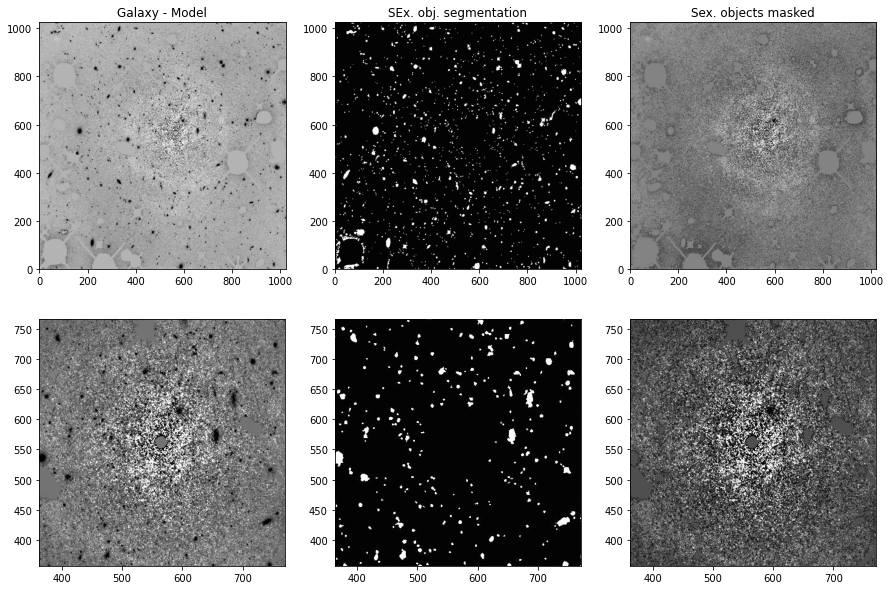

In [55]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


ax1 = tv(residual, ax=AX[0][0])
ax2 = tv(sex_objname, ax=AX[0][1])
ax3 = tv(sex_masked, ax=AX[0][2], options='')

ax1.set_title("Galaxy - Model")
ax2.set_title("SEx. obj. segmentation")
ax3.set_title("Sex. objects masked")

zoom = 5
ax1 = tv(sex_mask, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
ax2 = tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
ax3 = tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')

In [56]:
residual

'./output/Outputs_u12517/u12517_9f43b1726bf2//resid.000'

In [57]:
os.system("ds9 "+sex_masked+" &")

0

In [ ]:
os.system("ds9 "+sex_mask+"  "+sex_objname+" &")